# Part 3: Data Visualization

In [29]:
# Importing necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [31]:
warnings.filterwarnings('ignore')

##### **Loading the data**

In [13]:
df = pd.read_csv('Book_Details.csv')
df

,Title,Price,Ratings,Availability
0,A Light in the Attic,51.77,3,In stock
1,Tipping the Velvet,53.74,1,In stock
2,Soumission,50.10,1,In stock
3,Sharp Objects,47.82,4,In stock
4,Sapiens: A Brief History of Humankind,54.23,5,In stock
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,1,In stock
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,4,In stock
997,A Spy's Devotion (The Regency Spies of London #1),16.97,5,In stock
998,1st to Die (Women's Murder Club #1),53.98,1,In stock


##### **Removing duplicate values**

In [14]:
#There is no Duplicate Values but I am showing the process of how to remove duplicate values
df.drop_duplicates(inplace= True) # inplace attribute to make sure that duplicate values removed from orignal dataframe

# To make sure if there is any duplicate values after removing it
df.duplicated().sum()

0

##### **Statical discription of numerical column**

In [15]:
df.describe() # It gives us statical iformation like min, max, std, mean of numerical column

,Price,Ratings
count,1000.00000,1000.000000
mean,35.07035,2.923000
std,14.44669,1.434967
min,10.00000,1.000000
25%,22.10750,2.000000
50%,35.98000,3.000000
75%,47.45750,4.000000
max,59.99000,5.000000


##### **Correlation Price vs Rating**

In [16]:
numeric = df.select_dtypes(include=np.number)
numeric.corr()

,Price,Ratings
Price,1.000000,0.028166
Ratings,0.028166,1.000000


##### **Checking Outliers**

In [17]:
num_column = df.select_dtypes(include=np.number)
for col in num_column:
    Q1 = df[col].quantile(.25)
    Q2 = df[col].quantile(.5)
    Q3 = df[col].quantile(.75)

    IQR = Q3 - Q1       # Inter Quantile Range
    LW = Q1 - 1.5*IQR   # Lower Wishker
    UW = Q3 + 1.5*IQR   # Upper Wishker

    outliers =  (df[col] < LW) | (df[col] > UW)
    outliers_pct = round(outliers.sum()/len(df)*100, 2)
    print(f"{col} has {outliers_pct} % outliers")



Price has 0.0 % outliers
Ratings has 0.0 % outliers


##### **Top 3 Cheapest Book in each rating category**

In [76]:
sorted_df = df.sort_values(['Ratings','Price'], ascending=[True, True])
cheapest_books = sorted_df.groupby('Ratings', sort= True).head(3).reset_index(drop=True)
cheapest_books

,Title,Price,Ratings,Availability
0,The Lucifer Effect: Understanding How Good Peo...,10.40,1,In stock
1,Counting Thyme,10.62,1,In stock
2,The Project,10.65,1,In stock
3,The Tipping Point: How Little Things Can Make ...,10.02,2,In stock
4,The Fellowship of the Ring (The Lord of the Ri...,10.27,2,In stock
5,"Adulthood Is a Myth: A ""Sarah's Scribbles"" Col...",10.90,2,In stock
6,Patience,10.16,3,In stock
7,Pet Sematary,10.56,3,In stock
8,The Complete Maus (Maus #1-2),10.64,3,In stock
9,The Origin of Species,10.01,4,In stock


##### **Top 3 Most Expensive Book in each rating category**

In [77]:
sorted_df = df.sort_values(['Ratings','Price'], ascending=[True, False])
sorted_df.groupby('Ratings', sort= True).head(3).reset_index(drop=True)

,Title,Price,Ratings,Availability
0,Thomas Jefferson and the Tripoli Pirates: The ...,59.64,1,In stock
1,The Improbability of Love,59.45,1,In stock
2,"Unstuffed: Decluttering Your Home, Mind, and Soul",58.09,1,In stock
3,Civilization and Its Discontents,59.95,2,In stock
4,Miller's Valley,58.54,2,In stock
5,The Lover's Dictionary,58.09,2,In stock
6,The Perfect Play (Play by Play #1),59.99,3,In stock
7,Last One Home (New Beginnings #1),59.98,3,In stock
8,The Diary of a Young Girl,59.90,3,In stock
9,The Man Who Mistook His Wife for a Hat and Oth...,59.45,4,In stock


##### **Count of Books in Different Price Ranges (e.g., 0-100, 101-200, etc.). Created a Bar Chart**


In [20]:
newdf = df.copy()
bins = [0, 25, 50, 75, 100]
price_category = ['0-25', '26-50', '51-75', '75+']
newdf['Price_Range'] = pd.cut(newdf['Price'], bins=bins, labels = price_category)
price_category_group = newdf.groupby('Price_Range', observed=False).agg(Count=('Title', 'count')).reset_index()
price_category_group

,Price_Range,Count
0,0-25,299
1,26-50,503
2,51-75,198
3,75+,0


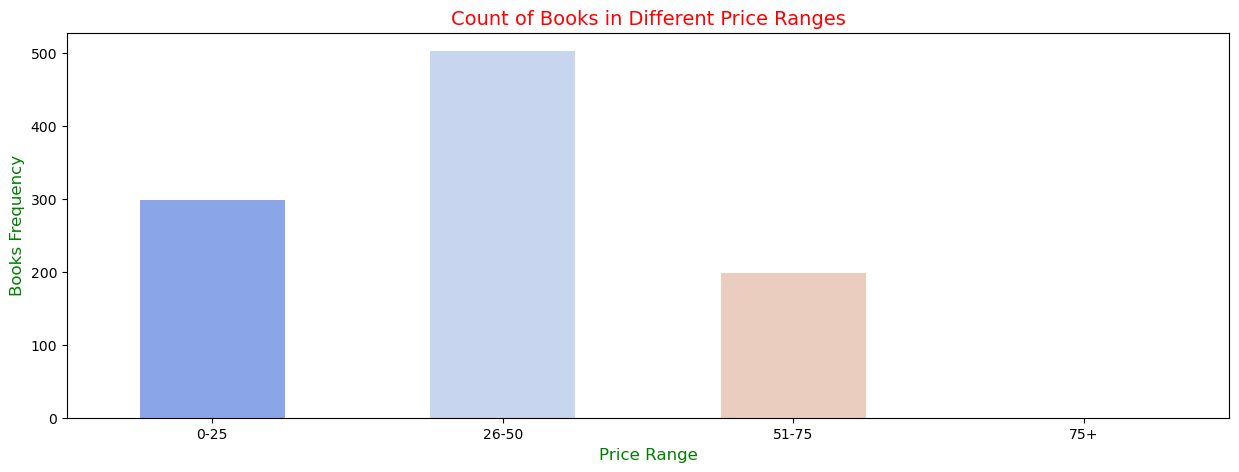

In [32]:
price_category  = np.array(price_category_group['Price_Range'])
count  = np.array(price_category_group['Count'])
plt.figure(figsize=(15, 5))
sns.barplot(x=price_category, y=count, palette='coolwarm', width=.5)
plt.title('Count of Books in Different Price Ranges', color='red', fontsize=14)
plt.xlabel('Price Range', color='green', fontsize=12)
plt.ylabel('Books Frequency', color='green', fontsize=12)
plt.show()

Most books are priced between 26-50, making them the most common choice. Some books fall into the 0-25 range, showing that affordable books are also available. However, books priced between 51-75 are much fewer, and there are no books above 75, meaning expensive books are very rare in this collection.

##### **Rating category has the highest number of books, the books distributed across different ratings**

In [33]:
newdf.head()
grouped = newdf.groupby(['Price_Range', 'Ratings'], observed=False).size().unstack(fill_value=0)
grouped

Ratings,1,2,3,4,5
Price_Range,,,,,
0-25,70,54,61,55,59
26-50,116,108,103,84,92
51-75,40,34,39,40,45
75+,0,0,0,0,0


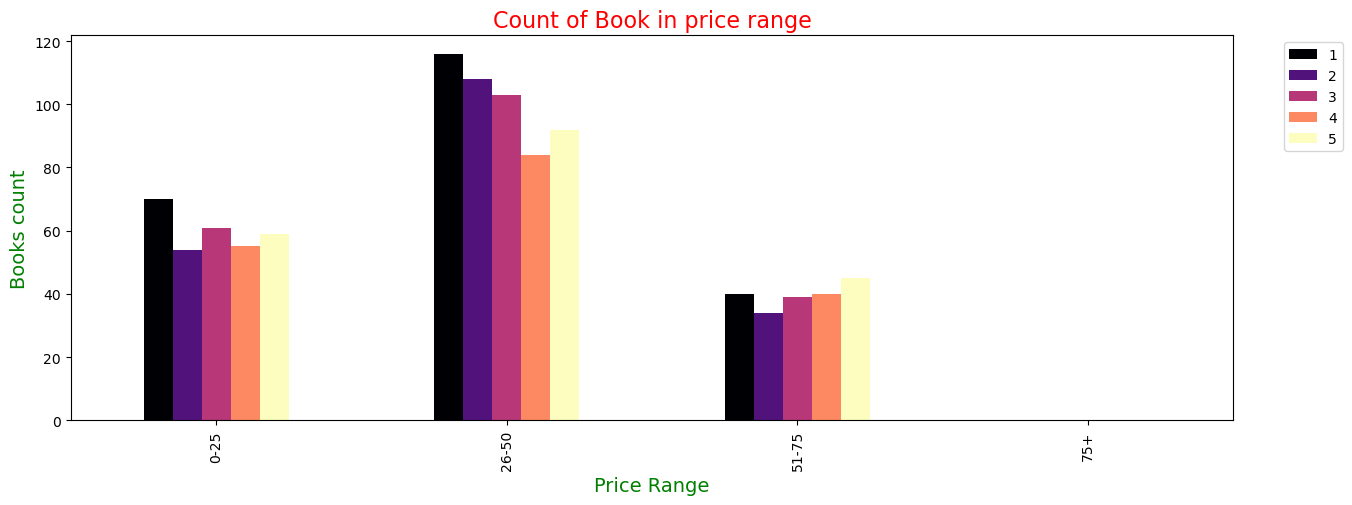

In [40]:
grouped.plot(kind='bar', colormap='magma', figsize=(15, 5))
plt.title('Count of Book in price range', color='red', fontdict={'fontsize':16})
plt.xlabel('Price Range', color='green', fontdict={'fontsize':14})
plt.ylabel('Books count', color='green', fontdict={'fontsize':14})
plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()


Most books fall in the 26-50 price range, with rating 1 being the most common in every category. Cheaper books (0-25) have a balanced mix of ratings, while very expensive books (75+) are rare. This means people might prefer buying books in the mid-price range, regardless of ratings.

##### **Frequency of Books in each rating category**

In [41]:
count_per_rating = df.groupby('Ratings').agg(count=('Title', 'count')).reset_index()
rating  = np.array(count_per_rating['Ratings'])
count  = np.array(count_per_rating['count'])

print(rating)
print(count)

[1 2 3 4 5]
[226 196 203 179 196]


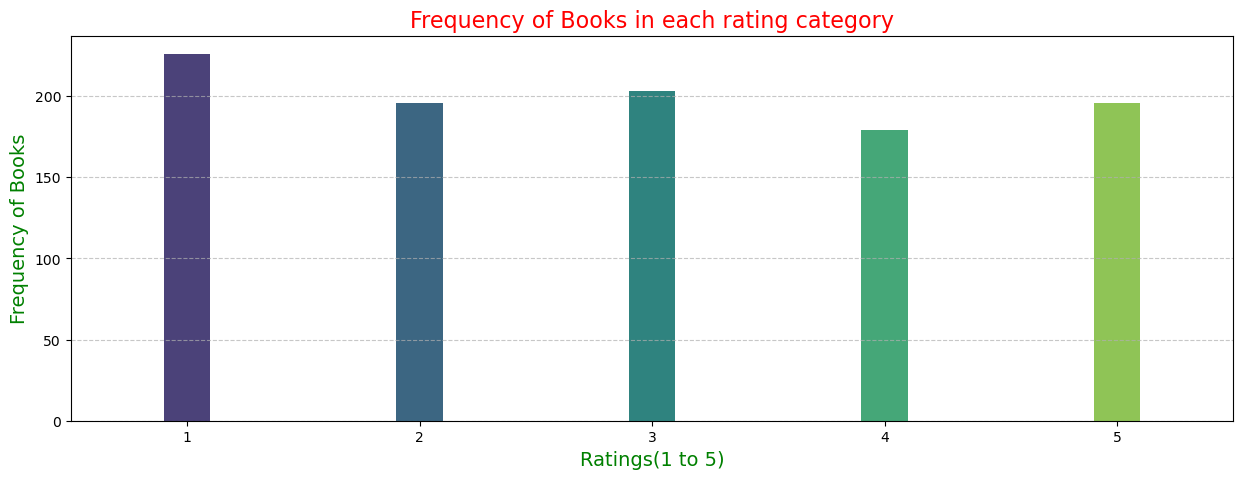

In [45]:
plt.figure(figsize=(15,5))
sns.barplot(x=rating, y=count, palette='viridis', width=.2)
plt.grid(axis='y', ls='--', alpha=.7)
plt.title('Frequency of Books in each rating category', color='red', fontsize=16)
plt.xlabel('Ratings(1 to 5)', color='green', fontsize=14)
plt.ylabel('Frequency of Books', color='green', fontsize=14)
plt.show()

Most books have a rating of 1, meaning many readers didn’t enjoy them. Ratings 2, 3, and 5 have similar book counts, while rating 4 has the least number of books. This suggests that books are either loved or disliked, with fewer books getting an average score.

##### **Do highly-rated books have consistent pricing, or are they overpriced?** **Boxplot (Price Distribution by Rating)**


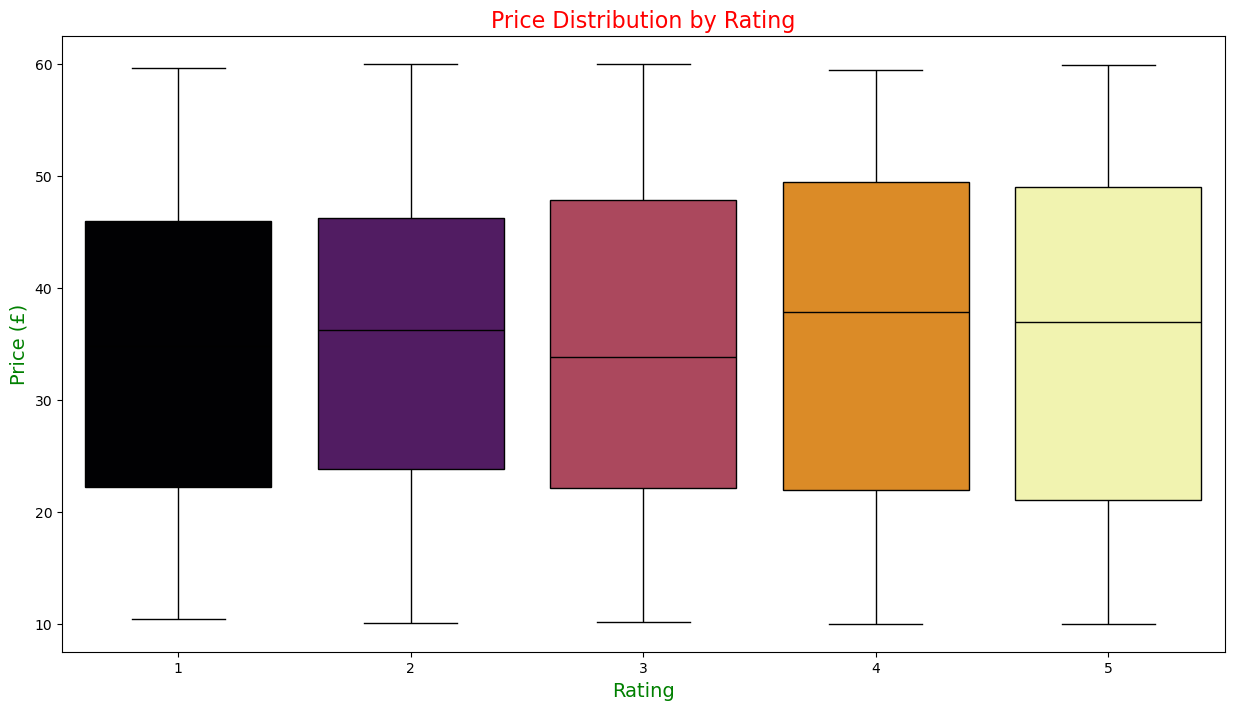

In [46]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Ratings', y='Price', data=df, hue='Ratings', palette="inferno", legend=False)
plt.title('Price Distribution by Rating', color='red', fontsize=16)
plt.xlabel('Rating', color='green', fontsize=14)
plt.ylabel('Price (£)', color='green', fontsize=14)
plt.show()

Book prices range from £10 to £60 across all ratings, with no clear link between price and rating. Highly-rated books aren’t always expensive, and lower-rated books aren’t necessarily cheaper. Since this is a box plot with no points outside the whiskers, there are no outliers in the data.

**Is there a relationship between price and rating?** **Scatter Plot (Price vs. Rating)**


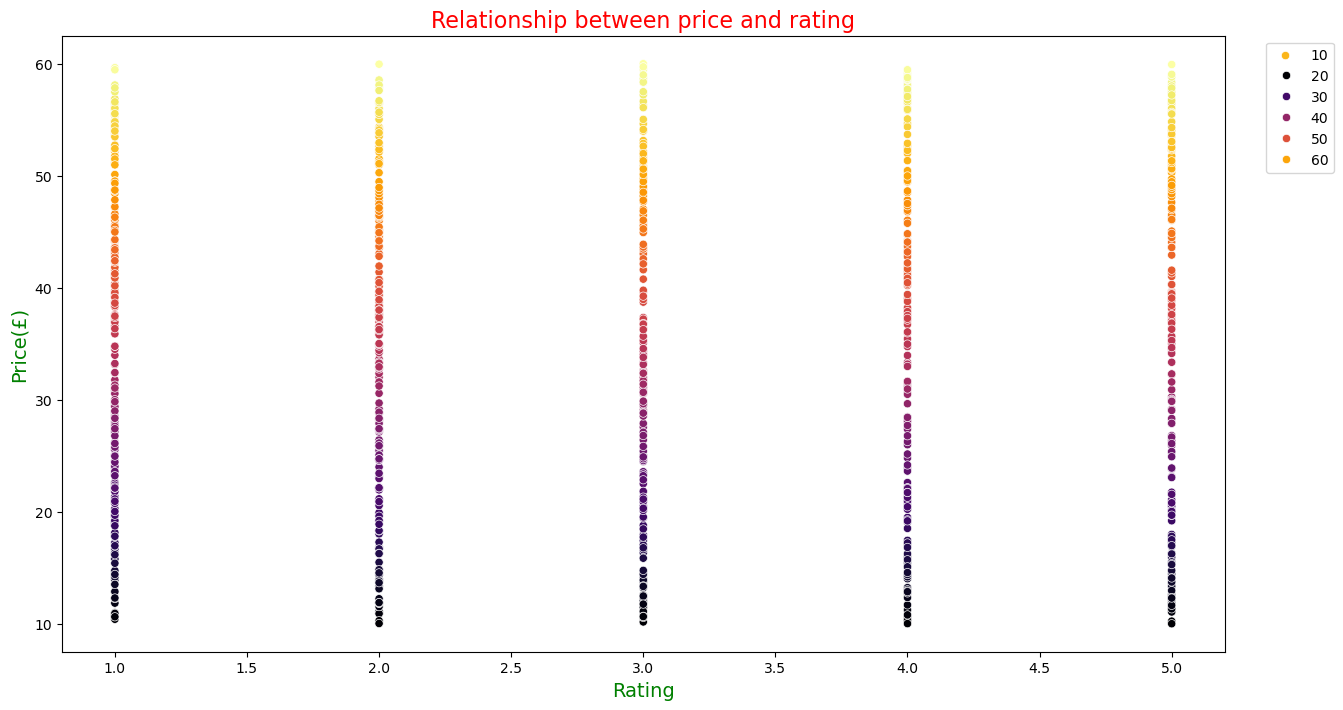

In [64]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['Ratings'], y=df['Price'], hue= df['Price'], palette='inferno')
plt.title('Relationship between price and rating', color='red', fontsize=16)
plt.xlabel("Rating", color='green', fontsize=14)
plt.ylabel("Price(£)", color='green', fontsize=14)
plt.legend(bbox_to_anchor=(1.1, 1), labels=[10, 20, 30, 40, 50, 60])
plt.show()

The scatter plot shows the relationship between book prices and ratings. There is no clear pattern, meaning both expensive and cheap books can have any rating. This suggests that book price does not directly affect its rating.